In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc
cset =  tc.tol_cset("light")

In [2]:
# load data
rb_rc_800 = pd.read_csv("result/rb_cls100_10000-s.csv", usecols=["Obj Val", "Num Violations"])
rb_lt_800 = pd.read_csv("result/rb_thd100_10000-s.csv", usecols=["Obj Val", "Num Violations"])
rb_rc_8000 = pd.read_csv("result/rb_cls100_10000.csv", usecols=["Obj Val", "Num Violations"])
rb_lt_8000 = pd.read_csv("result/rb_thd100_10000.csv", usecols=["Obj Val", "Num Violations"])
rb_rc_80000 = pd.read_csv("result/rb_cls100_10000-l.csv", usecols=["Obj Val", "Num Violations"])
rb_lt_80000 = pd.read_csv("result/rb_thd100_10000-l.csv", usecols=["Obj Val", "Num Violations"])

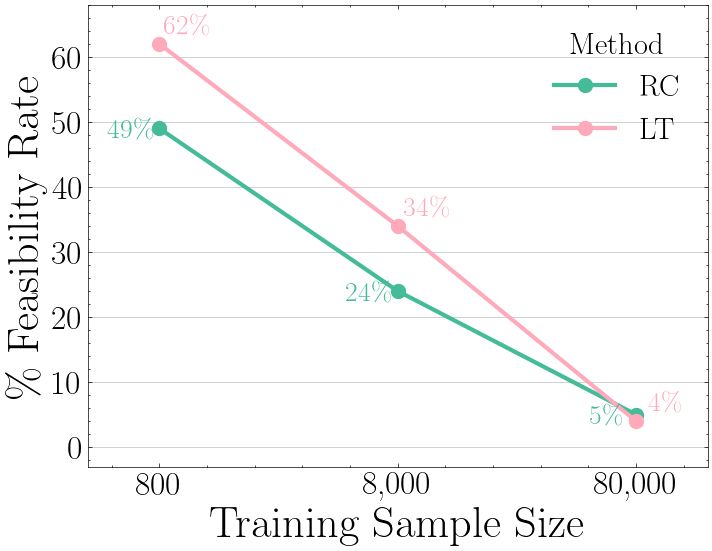

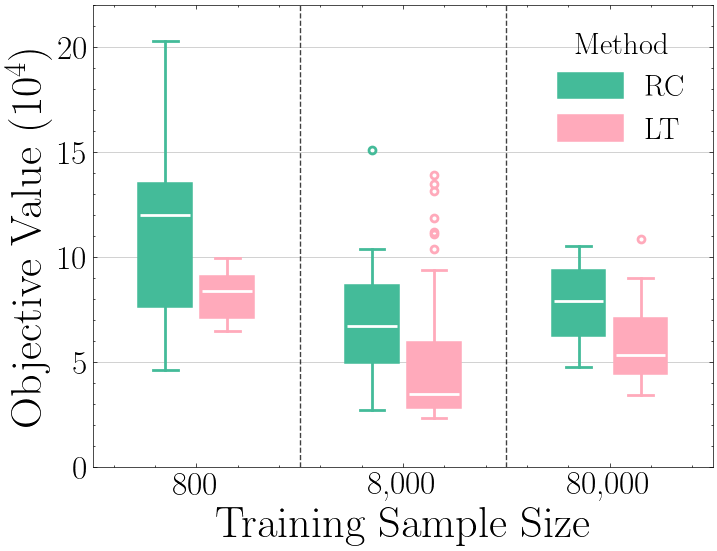

In [3]:
# line plot for feasibility rate
# size
plt.figure(figsize=(8, 6))
# line
rc_frate = [(rb_rc_800["Num Violations"] > 0).mean()*100, 
            (rb_rc_8000["Num Violations"] > 0).mean()*100, 
            (rb_rc_80000["Num Violations"] > 0).mean()*100]
plt.plot(np.array(rc_frate), marker="o", linestyle="-", linewidth=3, markersize=10, label="RC", color=cset.mint)
lt_frate = [(rb_lt_800["Num Violations"] > 0).mean()*100, 
            (rb_lt_8000["Num Violations"] > 0).mean()*100, 
            (rb_lt_80000["Num Violations"] > 0).mean()*100]
plt.plot(np.array(lt_frate), marker="o", linestyle="-", linewidth=3, markersize=10, label="LT", color=cset.pink)
# annotate
for i, val in enumerate(rc_frate):
    plt.text(i-0.12, val-1.5, f"{val:.0f}\%", ha="center", fontsize=20, color=cset.mint)
for i, val in enumerate(lt_frate):
    plt.text(i+0.12, val+1.5, f"{val:.0f}\%", ha="center", fontsize=20, color=cset.pink) 
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# style
#plt.title("20000×5 Rosenbrock", fontsize=36)
plt.xlabel("Training Sample Size", fontsize=32)
plt.ylabel("\% Feasibility Rate", fontsize=32)
plt.xticks(ticks=[0,1,2], labels=["800", "8,000", "80,000"], fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(-0.3, 2.3)
plt.ylim(-3, 68)
plt.legend(title="Method", fontsize=22, title_fontsize=22)
plt.savefig("./img/rb_frate.pdf", dpi=300)

# boxplot for objective value
# size
plt.figure(figsize=(8, 6))
# box
obj_rc = pd.DataFrame({
    "800": rb_rc_800["Obj Val"].values / 10**4,
    "8,000": rb_rc_8000["Obj Val"].values / 10**4,
    "80,000": rb_rc_80000["Obj Val"].values / 10**4
})
c = cset.mint
bp1 = plt.boxplot(obj_rc, boxprops=dict(facecolor=c, color=c, linewidth=4), medianprops=dict(color="w", linewidth=2), 
                  whiskerprops=dict(color=c, linewidth=2), capprops=dict(color=c, linewidth=2),
                  flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                  patch_artist=True, positions=np.arange(3)-0.15, widths=0.24)
obj_lt = pd.DataFrame({
    "800": rb_lt_800["Obj Val"].values / 10**4,
    "8,000": rb_lt_8000["Obj Val"].values / 10**4,
    "80,000": rb_lt_80000["Obj Val"].values / 10**4
})
c = cset.pink
bp2 = plt.boxplot(obj_lt, boxprops=dict(facecolor=c, color=c, linewidth=4), medianprops=dict(color="w", linewidth=2), 
                  whiskerprops=dict(color=c, linewidth=2), capprops=dict(color=c, linewidth=2),
                  flierprops=dict(markeredgecolor=c, marker="o", markersize=5, markeredgewidth=2),
                  patch_artist=True, positions=np.arange(3)+0.15, widths=0.24)
# vertical line
plt.axvline(x=0.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
plt.axvline(x=1.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
# grid
plt.grid(color="grey", alpha=0.5, linewidth=0.5, which="major", axis="y")
# style
#plt.title("20000×5 Rosenbrock", fontsize=36)
plt.xlabel("Training Sample Size", fontsize=32)
plt.ylabel("Objective Value ($10^4$)", fontsize=32)
plt.xticks(ticks=[0,1,2], labels=["800", "8,000", "80,000"], fontsize=24)
plt.yticks(ticks=[5 * i for i in range(6)], fontsize=22)
plt.yticks(fontsize=24)
plt.xlim(-0.5, 2.5)
plt.ylim(0, 22)
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ["RC", "LT"], title="Method", fontsize=22, title_fontsize=22)
plt.savefig("./img/rb_obj.pdf", dpi=300)